In [ ]:
import pandas as pd

def convert_pickle_to_csv(pickle_file, csv_file):
    # Read the pickle file
    data_frame = pd.read_pickle(pickle_file)

    # Convert the DataFrame to CSV
    data_frame.to_csv(csv_file, index=False)

    print("Conversion completed successfully.")

# Example usage
pickle_file = '../camb_model/cwi_2018-master/final_camb_feats/WikiNews_Train_actual'
csv_file = '../camb_model/cwi_2018-master/final_camb_feats/WikiNews_Train_actual.csv'
convert_pickle_to_csv(pickle_file, csv_file)


In [41]:
#Funtion for word freq
import requests

url = 'https://api.ngrams.dev/eng/search'
params = {
    'query': 'Vertebrate Paleontology',
    'flags': 'cs', 
    'limit': 3
}

response = requests.get(url, params=params)
data = response.json()
print(data)

{'queryTokens': [{'text': 'Vertebrate', 'type': 'TERM'}, {'text': 'Paleontology', 'type': 'TERM'}], 'ngrams': [{'id': 'ad48b3ddee1219b668e6629711e90ecd', 'absTotalMatchCount': 138492, 'relTotalMatchCount': 6.596571431528912e-08, 'tokens': [{'text': 'Vertebrate', 'type': 'TERM'}, {'text': 'Paleontology', 'type': 'TERM'}]}], 'nextPageToken': '70eab2a450d4a3ff3d871e832d72b0f7107025ec0fd65399659a7ed5472f3f90514390676f77426e0e35051744857ad0', 'nextPageLink': 'https://api.ngrams.dev/eng/search?query=Vertebrate+Paleontology&flags=cs&limit=3&start=70eab2a450d4a3ff3d871e832d72b0f7107025ec0fd65399659a7ed5472f3f90514390676f77426e0e35051744857ad0'}


In [2]:
import pandas as pd
import pickle

# Load the pickle file into a DataFrame
with open('features_NEW/Wikipedia_Dev_NEW_Feats1.pkl', 'rb') as file:
    df = pickle.load(file)

# Filter the DataFrame to include only rows where syllables is 0
filtered_df = df[df['syllables'] == 0]

# Get the words from the filtered DataFrame
words = filtered_df['word'].tolist()

# Print the words
for word in words:
    print(word)

Epidexipteryx
oviraptorosaurs
Epidexipteryx
Daohugou
Epidexipteryx
EIHL
sekihan
Paramarthika


In [53]:
import requests

def get_ngram_counts(df):
    abs_counts = []
    rel_counts = []

    for word in df['word']:
        url = 'https://api.ngrams.dev/eng/search'
        params = {
            'query': word,
            'flags': 'cs',
            'limit': 1
        }

        response = requests.get(url, params=params)
        data = response.json()

        if 'ngrams' in data and len(data['ngrams']) > 0:
            abs_count = data['ngrams'][0]['absTotalMatchCount']
            rel_count = data['ngrams'][0]['relTotalMatchCount']
        else:
            abs_count = None
            rel_count = None

        abs_counts.append(abs_count)
        rel_counts.append(rel_count)

    df['absTotalMatchCount'] = abs_counts
    df['relTotalMatchCount'] = rel_counts

    return df
get_ngram_counts(df)

,ID,sentence,start_index,end_index,word,total_native,total_non_native,native_complex,non_native_complex,complex_binary,complex_probabilistic,split,absTotalMatchCount,relTotalMatchCount
0,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,4,8,tail,10,10,0,2,1,0.1,[tail],37543836.0,1.879527e-05
1,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,12,25,Epidexipteryx,10,10,6,3,1,0.45,[Epidexipteryx],433.0,2.167693e-10
2,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,35,bore,10,10,0,3,1,0.15,[bore],31560294.0,1.579977e-05
3,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,53,bore unusual vertebrae,10,10,0,1,1,0.05,"[bore, unusual, vertebrae]",NaN,NaN
4,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,36,53,unusual vertebrae,10,10,2,0,1,0.1,"[unusual, vertebrae]",49.0,2.333940e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,149,159,Vertebrate,10,10,0,0,0,0.0,[Vertebrate],868055.0,4.345673e-07
74,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,149,194,Vertebrate Paleontology and Paleoanthropology,10,10,1,0,1,0.05,"[Vertebrate, Paleontology, and, Paleoanthropol...",6413.0,3.383139e-09
75,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,160,172,Paleontology,10,10,1,3,1,0.2,[Paleontology],1362553.0,6.821238e-07
76,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,177,194,Paleoanthropology,10,10,1,3,1,0.2,[Paleoanthropology],30881.0,1.545970e-08


In [51]:
df

,ID,sentence,start_index,end_index,word,total_native,total_non_native,native_complex,non_native_complex,complex_binary,complex_probabilistic,split
0,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,4,8,tail,10,10,0,2,1,0.1,[tail]
1,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,12,25,Epidexipteryx,10,10,6,3,1,0.45,[Epidexipteryx]
2,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,35,bore,10,10,0,3,1,0.15,[bore]
3,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,53,bore unusual vertebrae,10,10,0,1,1,0.05,"[bore, unusual, vertebrae]"
4,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,36,53,unusual vertebrae,10,10,2,0,1,0.1,"[unusual, vertebrae]"
...,...,...,...,...,...,...,...,...,...,...,...,...
73,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,149,159,Vertebrate,10,10,0,0,0,0.0,[Vertebrate]
74,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,149,194,Vertebrate Paleontology and Paleoanthropology,10,10,1,0,1,0.05,"[Vertebrate, Paleontology, and, Paleoanthropol..."
75,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,160,172,Paleontology,10,10,1,3,1,0.2,[Paleontology]
76,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,Epidexipteryx ( `` display feather '' ) is a g...,177,194,Paleoanthropology,10,10,1,3,1,0.2,[Paleoanthropology]


In [ ]:
from google_ngram_downloader import readline_google_store

fname = 'googlebooks-eng-all-3gram-20120701-0.gz'
url
# Read records from the dataset file
records = readline_google_store(fname)

# Skip the first record
next(records)

# Retrieve and print information from the second record
record = next(records)
print("Ngram:", record.ngram)
print("Year:", record.year)
print("Match Count:", record.match_count)
print("Volume Count:", record.volume_count)


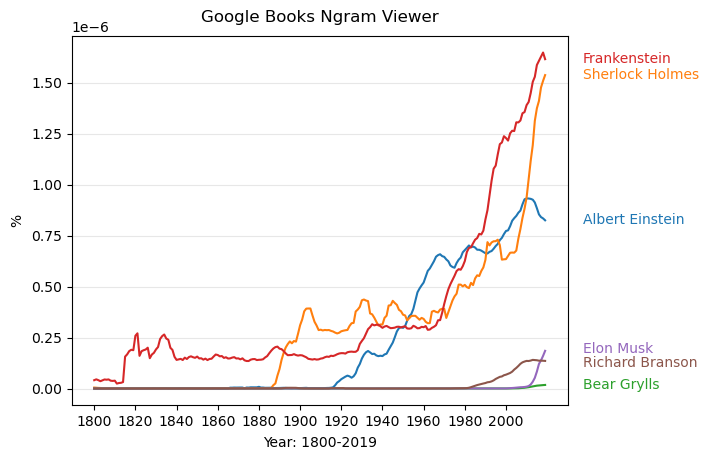

In [9]:


import requests, matplotx
import pandas as pd
import matplotlib.pyplot as plt
params = {
    "content": "Albert Einstein,Sherlock Holmes,Bear Grylls,Frankenstein,Elon Musk,Richard Branson",
    "year_start": "1800",
    "year_end": "2019"
}

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
}

html = requests.get("https://books.google.com/ngrams/json", params=params, headers=headers, timeout=30).text
time_series = pd.read_json(html, typ="series")

year_values = list(range(int(params['year_start']), int(params['year_end']) + 1))

for series in time_series:
    plt.plot(year_values, series["timeseries"], label=series["ngram"])

plt.title("Google Books Ngram Viewer", pad=10)
matplotx.line_labels()  # https://stackoverflow.com/a/70200546/15164646

plt.xticks(list(range(int(params['year_start']), int(params['year_end']) + 1, 20)))
plt.grid(axis="y", alpha=0.3)

plt.ylabel("%", labelpad=5)
plt.xlabel(f"Year: {params['year_start']}-{params['year_end']}", labelpad=5)
plt.show()

In [21]:
import requests
import pandas as pd

word_list = ["Albert Einstein", "Sherlock Holmes", "Bear Grylls", "Frankenstein", "Elon Musk", "Richard Branson"]

word_frequencies = {}

for word in word_list:
    params = {
        "content": word,
        "year_start": "2023",
        "year_end": "2023"
    }

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36"
    }

    try:
        response = requests.get("https://books.google.com/ngrams/json", params=params, headers=headers, timeout=30)
        response.raise_for_status()  # Check for any request errors
        data = response.json()

        if isinstance(data, list) and len(data) > 0 and "timeseries" in data[0]:
            word_frequency = data[0]["timeseries"][0]["c"]
            word_frequencies[word] = word_frequency
        else:
            word_frequencies[word] = 0

    except requests.exceptions.RequestException as e:
        print(f"An error occurred for word '{word}': {e}")

# Convert word frequencies dictionary to a DataFrame
df_word_frequencies = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=["Frequency"])

print("Word Frequencies in 2023:")
print(df_word_frequencies)


TypeError: 'float' object is not subscriptable

In [11]:
import pandas as pd
from collections import defaultdict
import re
# Read the CSV file into a DataFrame
word_features = pd.read_csv('features/News_Dev_allInfo.csv')
def HIT_freq(data_frame, word, ID):
    paragraph = data_frame[data_frame['ID'] == ID]
    word_count = paragraph['word'].str.lower().value_counts().to_dict()
    word_occurrences = word_count.get(word.lower(), 0)
    return word_occurrences

def count_all_word_occurrences(file_path):
    word_counts = defaultdict(int)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            words = re.findall(r'\b\w+\b', line.lower())
            for word in words:
                word_counts[word] += 1
    
    return word_counts


def process_csv_file(csv_file_path):
    # Read the CSV file
    data_frame = pd.read_csv(csv_file_path)

    # Apply the HIT_freq function to calculate frequencies
    data_frame['HIT_freq'] = data_frame.apply(lambda row: HIT_freq(data_frame, row['word'], row['ID']), axis=1)

    # Read the simple wiki frequency file
    simple_wiki_file_path = "corpus/simple_wiki.txt"
    simple_wiki_word_counts = count_all_word_occurrences(simple_wiki_file_path)

    # Merge the word frequencies into the DataFrame
    data_frame['simple_wiki_freq'] = data_frame['word'].map(simple_wiki_word_counts)

    # Save the modified DataFrame to a pickle file
    pickle_file_path = csv_file_path[:-4] + '.pkl'
    data_frame.to_pickle(pickle_file_path)

    # Save the modified DataFrame to a CSV file
    csv_output_file_path = csv_file_path[:-4] + '_output.csv'
    data_frame.to_csv(csv_output_file_path, index=False)

    print(f"Processed file '{csv_file_path}'. Saved to '{pickle_file_path}' and '{csv_output_file_path}'.")


# Specify the CSV file path
csv_file_path = 'features/News_Dev_allInfo.csv'

# Process the CSV file
process_csv_file(csv_file_path)

# Specify the CSV file path
csv_file_path = 'features/News_Dev_allInfo.csv'

# Process the CSV file
process_csv_file(csv_file_path)


Processed file 'features/News_Dev_allInfo.csv'. Saved to 'features/News_Dev_allInfo.pkl' and 'features/News_Dev_allInfo_output.csv'.
Processed file 'features/News_Dev_allInfo.csv'. Saved to 'features/News_Dev_allInfo.pkl' and 'features/News_Dev_allInfo_output.csv'.


In [20]:
import pandas as pd
from collections import defaultdict
import re


def count_all_word_occurrences(file_path):
    word_counts = defaultdict(int)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            words = re.findall(r'\b\w+\b', line.lower())
            for word in words:
                word_counts[word] += 1
                
    return word_counts


def HIT_freq(data_frame, word, ID):
    paragraph = data_frame[data_frame['ID'] == ID]
    word_count = paragraph['word'].str.lower().value_counts().to_dict()
    word_occurrences = word_count.get(word.lower(), 0)
    return word_occurrences


def count_word_occurrences(csv_file_path, word_counts):
    word_features = pd.read_csv(csv_file_path)

    word_features['simple_wiki_freq'] = word_features['word'].apply(lambda x: word_counts.get(x.lower(), 0))
    word_features['original word'] = word_features['word']
    word_features['HIT_freq'] = word_features.apply(lambda row: HIT_freq(word_features, row['word'], row['ID']), axis=1)

    word_features.to_csv(csv_file_path, index=False)

    print(f"Processed file '{csv_file_path}'. Saved the results.")


csv_file_path = 'features/News_Dev_allInfo.csv'
simple_wiki_file_path = 'corpus/simple_wiki.txt'

word_counts = count_all_word_occurrences(simple_wiki_file_path)

count_word_occurrences(csv_file_path, word_counts)


Processed file 'features/News_Dev_allInfo.csv'. Saved the results.


In [21]:


import pandas as pd

def count_word_occurrences(csv_file_path, word_counts):
    # Read the CSV file into a DataFrame
    word_features = pd.read_csv(csv_file_path)

    # Add a new column for the word occurrences
    word_features['simple_wiki_freq'] = word_features['word'].apply(lambda x: word_counts.get(x.lower(), 0))

    # Update the "original word" column with the original casing
    word_features['original word'] = word_features['word']

    # Save the modified DataFrame to the output file
    output_file_path = csv_file_path.replace('.csv', '_1.csv')
    word_features.to_csv(output_file_path, index=False)

    print(f"Processed file '{csv_file_path}'. Saved to '{output_file_path}'.")


# File path for the input CSV file
csv_file_path = 'features/News_Dev_allInfo.csv'

# File path for the simple_wiki.txt file
simple_wiki_file_path = 'corpus/simple_wiki.txt'

# Read and count word occurrences in the simple_wiki.txt file
word_counts = count_all_word_occurrences(simple_wiki_file_path)

# Count word occurrences in the input CSV file and save the result to a new CSV file
count_word_occurrences(csv_file_path, word_counts)


Processed file 'features/News_Dev_allInfo.csv'. Saved to 'features/News_Dev_allInfo_simp_wiki.csv'.


In [35]:
import pandas as pd
from collections import defaultdict
import re

def HIT_freq(data_frame, word, ID):
    paragraph = data_frame[data_frame['ID'] == ID]
    word_count = paragraph['word'].str.lower().value_counts().to_dict()
    word_occurrences = word_count.get(word.lower(), 0)
    return word_occurrences

def count_word_occurrences(csv_file_path, word_counts):
    word_features = pd.read_csv(csv_file_path)

    word_features['simple_wiki_freq'] = word_features['word'].apply(lambda x: word_counts.get(x.lower(), 0))
    word_features['original word'] = word_features['word']
    word_features['HIT_freq'] = word_features.apply(lambda row: HIT_freq(word_features, row['word'], row['ID']), axis=1)

    # Output CSV file path
    output_csv_file_path = csv_file_path.replace('.csv', '_1.csv')

    # Save the modified DataFrame to the output CSV file
    word_features.to_csv(output_csv_file_path, index=False)

    # Output pickle file path
    output_pickle_file_path = output_csv_file_path.replace('.csv', '.pkl')

    # Save the modified DataFrame to the output pickle file
    word_features.to_pickle(output_pickle_file_path)

    print(f"Processed file '{csv_file_path}'. Saved the results to '{output_csv_file_path}' and '{output_pickle_file_path}'.")

# File path for the input CSV file
csv_file_path = 'features/Wikipedia_Test_allInfo.csv'

# File path for the simple_wiki.txt file
simple_wiki_file_path = 'corpus/simple_wiki.txt'

# Read and count word occurrences in the simple_wiki.txt file
word_counts = count_all_word_occurrences(simple_wiki_file_path)

# Count word occurrences in the input CSV file and save the result to the output CSV file and a pickle file
count_word_occurrences(csv_file_path, word_counts)


Processed file 'features/Wikipedia_Test_allInfo.csv'. Saved the results to 'features/Wikipedia_Test_allInfo_1.csv' and 'features/Wikipedia_Test_allInfo_1.pkl'.


In [26]:
import pandas as pd
from collections import defaultdict
import re

def HIT_freq(data_frame, word, ID):
    paragraph = data_frame[data_frame['ID'] == ID]
    word_count = paragraph['word'].str.lower().value_counts().to_dict()
    word_occurrences = word_count.get(word.lower(), 0)
    return word_occurrences

def count_word_occurrences(csv_file_path, word_counts):
    word_features = pd.read_csv(csv_file_path)

    word_features['simple_wiki_freq'] = word_features['word'].apply(lambda x: word_counts.get(x.lower(), 0))
    word_features['original word'] = word_features['word']
    word_features['HIT_freq'] = word_features.apply(lambda row: HIT_freq(word_features, row['word'], row['ID']), axis=1)

    # Save the modified DataFrame to the same CSV file
    word_features.to_csv(csv_file_path, index=False)

    # Save the modified DataFrame to a pickle file with the same name
    pickle_file_path = csv_file_path[:-4] + '.pkl'
    word_features.to_pickle(pickle_file_path)

    print(f"Processed file '{csv_file_path}'. Saved the results to '{csv_file_path}' and '{pickle_file_path}'.")

# File path for the input CSV file
csv_file_path = 'features/News_Dev_allInfo.csv'

# File path for the simple_wiki.txt file
simple_wiki_file_path = 'corpus/simple_wiki.txt'

# Read and count word occurrences in the simple_wiki.txt file
word_counts = count_all_word_occurrences(simple_wiki_file_path)

# Count word occurrences in the input CSV file and save the result to the same CSV file and a pickle file
count_word_occurrences(csv_file_path, word_counts)


Processed file 'features/News_Dev_allInfo.csv'. Saved the results to 'features/News_Dev_allInfo.csv' and 'features/News_Dev_allInfo.pkl'.


In [ ]:
import os
import pandas as pd

def convert_files_to_tsv(folder_path):
    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            # Construct the full paths
            pickle_file = os.path.join(folder_path, file_name)
            tsv_file = os.path.join(folder_path, os.path.splitext(file_name)[0] + '.tsv')

            # Read the pickle file
            data_frame = pd.read_pickle(pickle_file)

            # Convert the DataFrame to TSV
            data_frame.to_csv(tsv_file, sep='\t', index=False)

            print(f"Converted {pickle_file} to {tsv_file}")

        elif file_name.endswith('_allInfo'):
            # Construct the full paths
            info_file = os.path.join(folder_path, file_name)
            tsv_file = os.path.join(folder_path, file_name + '.tsv')

            try:
                # Read the info file (specify additional parameters)
                data_frame = pd.read_csv(info_file, sep='\t', engine='python', error_bad_lines=False, encoding='latin1')

                # Save the DataFrame as TSV
                data_frame.to_csv(tsv_file, sep='\t', index=False)

                print(f"Converted {info_file} to {tsv_file}")

            except pd.errors.ParserError:
                print(f"Error occurred while parsing {info_file}. Skipping file.")

    print("Conversion completed successfully.")

# Example usage
folder_path = 'features'
convert_files_to_tsv(folder_path)


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Specify the file name
file_name = 'WikiNews_Dev_allInfo'

# Combine the current directory with the file name to get the file path
file_path = os.path.join(current_dir, file_name)

# Print the file path
print(file_path)


In [ ]:
import os

# Get the directory where the Jupyter Notebook file is located
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Specify the file name
file_name = 'WikiNews_Dev_allInfo'

# Combine the directory with the file name to get the file path
file_path = os.path.join(notebook_dir, file_name)

# Print the file path
print(file_path)

In [26]:
import requests

def get_word_frequency(word):
    url = f"'https://api.ngrams.dev/eng/search?query=hello+*&flags=cs&limit=3'"
    
    try:
        response = requests.get(url)
        results = response.json()
        
        if results and 'tags' in results[0]:
            frequency_tag = next((tag for tag in results[0]['tags'] if tag.startswith('f:')), None)
            
            if frequency_tag:
                frequency = float(frequency_tag[2:])
                return frequency
        
        return None
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None
get_word_frequency('Hello')

An error occurred: No connection adapters were found for "'https://api.ngrams.dev/eng/search?query=hello+*&flags=cs&limit=3'"


In [54]:
frequency = get_word_frequency('[give-up]')
if frequency is not None:
    print(f"The word frequency is: {frequency}")
else:
    print("Failed to retrieve word frequency.")


The word frequency is: 3542.821517


In [9]:
import requests

def get_word_frequency(data_frame):
    ngram_freq = []
    
    for word in data_frame['word']:
        url = f"https://api.datamuse.com/words?sp={word}&md=f"
        
        try:
            response = requests.get(url)
            results = response.json()
            
            if results and 'tags' in results[0]:
                frequency_tag = next((tag for tag in results[0]['tags'] if tag.startswith('f:')), None)
                
                if frequency_tag:
                    frequency = float(frequency_tag[2:])
                    ngram_freq.append(frequency)
                else:
                    ngram_freq.append(None)
            else:
                ngram_freq.append(None)
        
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            ngram_freq.append(None)
    
    data_frame['Ngram_freq'] = ngram_freq
    
df = pd.read_pickle('features/News_Dev_AllInfo_1.pkl')
get_word_frequency(df)



NameError: name 'pd' is not defined

In [ ]:
import os
import pandas as pd

def convert_files_to_tsv(folder_path):
    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            # Construct the full paths
            pickle_file = os.path.join(folder_path, file_name)
            tsv_file = os.path.join(folder_path, os.path.splitext(file_name)[0] + '.tsv')

            # Read the pickle file
            data_frame = pd.read_pickle(pickle_file)

            # Convert the DataFrame to TSV
            data_frame.to_csv(tsv_file, sep='\t', index=False)

            print(f"Converted {pickle_file} to {tsv_file}")

        elif file_name.endswith('_allInfo'):
            # Construct the full paths
            info_file = os.path.join(folder_path, file_name)
            tsv_file = os.path.join(folder_path, file_name + '.tsv')

            try:
                # Read the info file (specify additional parameters)
                data_frame = pd.read_csv(info_file, sep='\t', engine='python', error_bad_lines=False, encoding='utf-8-sig')

                # Save the DataFrame as TSV
                data_frame.to_csv(tsv_file, sep='\t', index=False)

                print(f"Converted {info_file} to {tsv_file}")

            except pd.errors.ParserError:
                print(f"Error occurred while parsing {info_file}. Skipping file.")

    print("Conversion completed successfully.")

# Example usage
folder_path = 'features'
convert_files_to_tsv(folder_path)


In [ ]:
import pandas as pd

def compare_csv_files(file1, file2):
    # Read the CSV files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Get the unique words in each file
    words1 = set(df1['word'])
    words2 = set(df2['word'])

    # Find the differences between the two sets
    diff1 = words1 - words2
    diff2 = words2 - words1

    # Print the differences
    if diff1:
        print("Words in", file1, "but not in", file2 + ":")
        print(diff1)
        print()

    if diff2:
        print("Words in", file2, "but not in", file1 + ":")
        print(diff2)
        print()

    # Check if the word columns have the same length
    if len(df1) != len(df2):
        print("The word columns have different lengths.")

# Example usage
file1 = 'features/News_Test_allInfo.csv'
file2 = 'features/News_Test_Feats.csv'
compare_csv_files(file1, file2)



In [ ]:
import pandas as pd
import os

def create_non_native_tsv():
    # Get the list of TSV files in the "training_data" folder
    folder = "training_data"
    tsv_files = [file for file in os.listdir(folder) if file.endswith(".tsv")]

    # Iterate through each TSV file
    for tsv_file in tsv_files:
        # Read the input TSV file
        input_file = os.path.join(folder, tsv_file)
        df = pd.read_csv(input_file, delimiter='\t')

        # Check if there are any numbers or zeros in column 7
        has_numbers_or_zeros = any(df.iloc[:, 6].apply(lambda x: isinstance(x, (int, float)) or x == 0))

        # If there are numbers or zeros, create a new TSV file in the "Non-Native" folder
        if has_numbers_or_zeros:
            # Create the output folder if it doesn't exist
            os.makedirs("Non-Native", exist_ok=True)

            # Generate the new file name with "_non_native" appended
            output_file = os.path.join("Non-Native", os.path.splitext(tsv_file)[0] + "_non_native.tsv")

            # Write the filtered DataFrame to the new TSV file without changing the headers
            df.to_csv(output_file, sep='\t', index=False, header=False, mode='a')

            print(f"Created non-native TSV file: {output_file}")


create_non_native_tsv()


In [ ]:
import pandas as pd
import os

def create_native_tsv():
    # Get the list of TSV files in the "training_data" folder
    folder = "training_data"
    tsv_files = [file for file in os.listdir(folder) if file.endswith(".tsv")]

    # Iterate through each TSV file
    for tsv_file in tsv_files:
        # Read the input TSV file
        input_file = os.path.join(folder, tsv_file)
        df = pd.read_csv(input_file, delimiter='\t')

        # Check if there are any numbers or zeros in column 7
        has_numbers_or_zeros = any(df.iloc[:, 6].apply(lambda x: isinstance(x, (int, float)) or x == 0))

        # If there are numbers or zeros, create a new TSV file in the "Non-Native" folder
        if has_numbers_or_zeros:
            # Create the output folder if it doesn't exist
            os.makedirs("native", exist_ok=True)

            # Generate the new file name with "_non_native" appended
            output_file = os.path.join("native", os.path.splitext(tsv_file)[0] + "_native.tsv")

            # Write the filtered DataFrame to the new TSV file without changing the headers
            df.to_csv(output_file, sep='\t', index=False, header=False, mode='a')

            print(f"Created native TSV file: {output_file}")

create_native_tsv()

In [41]:
import pandas as pd


def convert_pickle_to_csv(pickle_file, csv_file):
    # Read the pickle file
    with open(pickle_file, 'rb') as file:
        data_dict = pickle.load(file)

    # Convert the dictionary to a DataFrame
    data_frame = pd.DataFrame(data_dict)

    # Convert the DataFrame to CSV
    data_frame.to_csv(csv_file, index=False)

    print("Conversion completed successfully.")

# Example usage
pickle_file = 'features/combined_data_News.pkl'
csv_file = 'features/combined_data_News.csv'
convert_pickle_to_csv(pickle_file, csv_file)

Conversion completed successfully.


In [ ]:
import os

def delete_tsv_files(folder_path):
    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tsv'):
            file_path = os.path.join(folder_path, file_name)
            try:
                os.remove(file_path)
                print(f"Deleted {file_path}")
            except OSError as e:
                print(f"Error occurred while deleting {file_path}: {e}")

    print("Deletion completed successfully.")

# Example usage
folder_path = 'features'
delete_tsv_files(folder_path)

In [ ]:
import pandas as pd
import os

def create_native_tsv():
    # Get the list of TSV files in the "training_data" folder
    folder = "training_data"
    tsv_files = [file for file in os.listdir(folder) if file.endswith(".tsv")]

    # Iterate through each TSV file
    for tsv_file in tsv_files:
        # Read the input TSV file
        input_file = os.path.join(folder, tsv_file)
        df = pd.read_csv(input_file, delimiter='\t')

        # Check if there are any numbers or zeros in column 6
        has_numbers_or_zeros = any(df.iloc[:, 5].apply(lambda x: isinstance(x, (int, float)) or x == 0))

        # If there are numbers or zeros, create a new TSV file in the "Native" folder
        if has_numbers_or_zeros:
            # Create the output folder if it doesn't exist
            os.makedirs("Native", exist_ok=True)

            # Generate the new file name with "_native" appended
            output_file = os.path.join("Native", os.path.splitext(tsv_file)[0] + "_native.tsv")

            # Write the filtered DataFrame to the new TSV file without changing the headers
            df.to_csv(output_file, sep='\t', index=False, header=True, mode='a')

            # Remove the ".1" appended to the headers
            with open(output_file, 'r+') as file:
                content = file.read()
                file.seek(0)
                file.write(content.replace('.1\t', '\t'))
                file.truncate()

            print(f"Created native TSV file: {output_file}")

create_native_tsv()


In [ ]:
import requests

def get_trigram_frequency(phrase):
    url = f"https://api.datamuse.com/trigrams?&s={phrase}"
    
    try:
        response = requests.get(url)
        data = response.json()
        if data:
            frequency = data[0].get("freq", 0)
            return frequency
    except (requests.exceptions.RequestException, ValueError) as e:
        print("Error occurred:", e)
    
    return 0  # Default value when encountering an error

# Example usage
frequency = get_trigram_frequency("I love Apples")
print("Trigram frequency:", frequency)

In [ ]:
from google_ngram_downloader import readline_google_store

In [ ]:
from google_ngram_downloader import readline_google_store

# Set the target directory to save the downloaded data
data_dir = '/path/to/downloaded_data'

# Specify the n-gram (trigram) and the year range
ngram = '3'
years = range(2022, 2023)

# Download the trigram data for the specified year range
for year in years:
    filename, _ = readline_google_store(ngram, year, data_dir=data_dir)
    print(f"Downloaded: {filename}")

In [36]:
import pickle

def combine_pickle_files(file1, file2, output_file):
    # Load data from the first pickle file
    with open(file1, 'rb') as f:
        data1 = pickle.load(f)

    # Load data from the second pickle file
    with open(file2, 'rb') as f:
        data2 = pickle.load(f)

    # Combine the data from both files
    combined_data = {**data1, **data2}

    # Save the combined data to the output pickle file
    with open(output_file, 'wb') as f:
        pickle.dump(combined_data, f)

    print(f"Combined data saved to {output_file}")


In [37]:
file1 = "features/News_Dev_allInfo_1.pkl"
file2 = "features/News_Train_allInfo_1.pkl"
output_file = "features/combined_data_News.pkl"

combine_pickle_files(file1, file2, output_file)

Combined data saved to features/combined_data_News.pkl


In [22]:
import requests
import pandas as pd

def get_word_info(word):
    url = f"https://api.datamuse.com/words?sp={word}&md=f"
    
    try:
        response = requests.get(url)
        results = response.json()
        
        if results and isinstance(results, list) and 'tags' in results[0]:
            frequency_tag = next((tag for tag in results[0]['tags'] if tag.startswith('f:')), None)
            
            if frequency_tag:
                frequency = float(frequency_tag[2:])
                syllables = get_syllables(word)
                length = len(word)
                vowels = sum(1 for char in word if char.lower() in "aeiou")
                
                return syllables, length, vowels, frequency
        
        return None
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

def get_syllables(word):
    url = f"https://api.datamuse.com/words?sp={word}&qe=sp&md=fs&max=1"
    
    try:
        response = requests.get(url)
        result = response.json()
        
        if result and isinstance(result, list) and 'numSyllables' in result[0]:
            syllables = int(result[0]['numSyllables'])
            return syllables
        
        return 0
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return 0

def get_bigram_data(words):
    bigram_data = []
    prev_word = None
    
    for word in words:
        syllables, length, vowels, frequency = get_word_info(word)
        
        if prev_word is not None:
            bigram_data.append({
                'word': f"{prev_word} {word}",
                'frequency': None  # Placeholder for bigram frequency, to be updated later
            })
        
        prev_word = word
    
    if len(words) > 1:
        last_word = words[-1]
        last_word_freq = next((word_info['frequency'] for word_info in bigram_data if word_info['word'] == last_word), None)
        if last_word_freq is not None:
            bigram_data.append({
                'word': last_word,
                'frequency': last_word_freq
            })
    
    return bigram_data

# Assuming you have a DataFrame named 'df' with a 'word' column
df = pd.DataFrame({'word': ["[barren-islands]", "tree", "rose-petal", "help me"]})

total_syllables = 0
total_length = 0
total_vowels = 0
total_frequency = 0.0

for index, row in df.iterrows():
    words = row['word'].split()
    
    for word in words:
        syllables, length, vowels, frequency = get_word_info(word)

        if syllables is not None:
            print(f"Word: {word}")
            print(f"Syllables: {syllables}")
            print(f"Length: {length}")
            print(f"Vowels: {vowels}")
            print(f"Frequency: {frequency:.10f}")

            total_syllables += syllables
            total_length += length
            total_vowels += vowels
            total_frequency += frequency
        else:
            print(f"Unable to retrieve information for '{word}'")
        
    bigram_data = get_bigram_data(words)
    if bigram_data:
        print("Bigram Data:")
        for bigram in bigram_data:
            word1, word2 = bigram['word'].split()
            word1_freq = next((word_info['frequency'] for word_info in bigram_data if word_info['word'] == word1), None)
            word2_freq = next((word_info['frequency'] for word_info in bigram_data if word_info['word'] == word2), None)
            if word1_freq is not None and word2_freq is not None:
                bigram_freq = word1_freq * word2_freq
                bigram['frequency'] = bigram_freq
                print(f"Word: {word1} {word2}, Frequency: {bigram_freq:.10f}")
            else:
                print(f"No frequency data available for '{word1} {word2}'")
    else:
        print("No bigram data available")

    print()

print(f"Total Syllables: {total_syllables}")
print(f"Total Length: {total_length}")
print(f"Total Vowels: {total_vowels}")
print(f"Total Frequency: {total_frequency:.10f}")


Word: [barren-islands]
Syllables: 4
Length: 16
Vowels: 4
Frequency: 120.3179690000
No bigram data available

Word: tree
Syllables: 1
Length: 4
Vowels: 2
Frequency: 55.0370830000
No bigram data available

Word: rose-petal
Syllables: 3
Length: 10
Vowels: 4
Frequency: 0.0589560000
No bigram data available

Word: help
Syllables: 1
Length: 4
Vowels: 1
Frequency: 194.3703960000
Word: me
Syllables: 1
Length: 2
Vowels: 1
Frequency: 751.3818520000
Bigram Data:
No frequency data available for 'help me'

Total Syllables: 10
Total Length: 36
Total Vowels: 12
Total Frequency: 1121.1662560000


In [98]:
def lookup_bigram_frequency(bigram):
    filepath = '/Users/adamtucker/Downloads/googlebooks-eng-all-2gram-20120701-ba'
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            for line in file:
                line_parts = line.strip().split('\t')
                if line_parts[0] == bigram:
                    return int(line_parts[2])  # Frequency is at index 2
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", str(e))
    
    return 0  # Return 0 if bigram not found or an error occurred

In [106]:
bigram = "Balanced Feed"
frequency = lookup_bigram_frequency(bigram)
print("Frequency of", bigram, ":", frequency)

Frequency of Balanced Feed : 2


In [84]:
filepath = '/Users/adamtucker/Downloads/googlebooks-eng-all-2gram-20120701-_NOUN_'
try:
    with open(filepath, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file):
            print(line.strip())
            if line_number == 4:  # Print only the first 5 lines
                break
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", str(e))


_NOUN_ $_NUM	1515	13	1
_NOUN_ $_NUM	1575	1	1
_NOUN_ $_NUM	1581	23	2
_NOUN_ $_NUM	1600	1	1
_NOUN_ $_NUM	1607	1	1


In [87]:
def print_lines(filepath, start_line, end_line):
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            for line_number, line in enumerate(file, start=1):
                if start_line <= line_number <= end_line:
                    print(line.strip())
                if line_number > end_line:
                    break
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", str(e))


In [131]:
filepath = '/Users/adamtucker/Downloads/googlebooks-eng-all-2gram-20120701-ba'
start_line = 1193999889
end_line = 1194000100

print_lines(filepath, start_line, end_line)


In [108]:
def retrieve_number_in_fourth_column(filename, bigram):
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            for line in file:
                line_parts = line.strip().split('\t')
                if line_parts[0] == bigram:
                    return int(line_parts[3])  # Assuming numbers are in the fourth column
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", str(e))
    return None  # Return None if bigram not found or an error occurred


In [112]:
def count_entries_for_bigram(filename, bigram):
    count = 0
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            for line in file:
                line_parts = line.strip().split('\t')
                if line_parts[0] == bigram:
                    count += 1
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", str(e))
    return count


In [132]:
filename = '/Users/adamtucker/Downloads/googlebooks-eng-all-2gram-20120701-ba'  # Replace with the correct file path
bigram = 'begin again'  # Replace with the desired bigram



In [133]:
count = count_entries_for_bigram(filename, bigram)
print("Number of entries for the bigram", bigram + ":", count)

Number of entries for the bigram begin again: 0


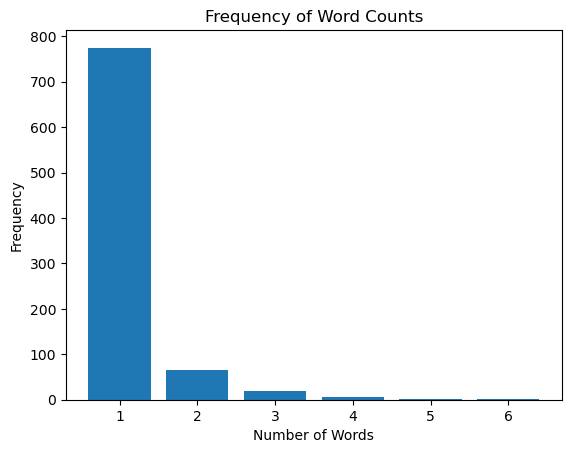

In [1]:
#Analysis of data
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(file_path):
    # Read the TSV file into a pandas DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Convert values in the fourth column to strings
    df.iloc[:, 4] = df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts')

    # Display the graph
    plt.show()

# Usage example:
file_path = 'cwishareddataset/traindevset/english/WikiNews_Dev.tsv'
create_word_count_bar_graph(file_path)



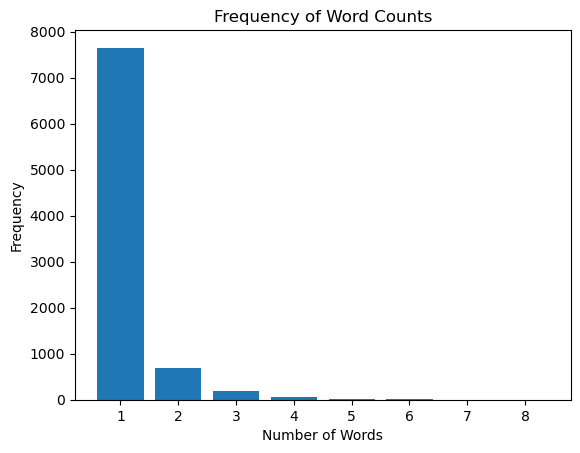

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(train_file_path, dev_file_path):
    # Read the train and dev TSV files into pandas DataFrames
    train_df = pd.read_csv(train_file_path, sep='\t')
    dev_df = pd.read_csv(dev_file_path, sep='\t')

    # Concatenate the train and dev DataFrames
    combined_df = pd.concat([train_df, dev_df], ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts')

    # Display the graph
    plt.show()

# Usage example:
train_file_path = 'cwishareddataset/traindevset/english/Wikinews_Train.tsv'
dev_file_path = 'cwishareddataset/traindevset/english/WikiNews_Dev.tsv'
create_word_count_bar_graph(train_file_path, dev_file_path)


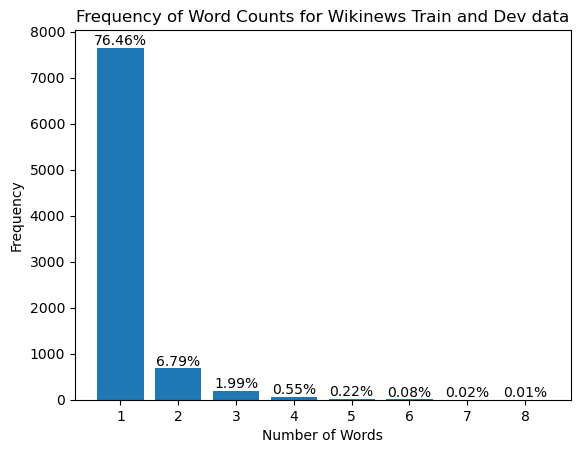

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(train_file_path, dev_file_path):
    # Read the train and dev TSV files into pandas DataFrames
    train_df = pd.read_csv(train_file_path, sep='\t')
    dev_df = pd.read_csv(dev_file_path, sep='\t')

    # Concatenate the train and dev DataFrames
    combined_df = pd.concat([train_df, dev_df], ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Calculate the percentage of words in each bar
    total_words = word_counts.sum()
    word_percentage = (word_count_freq / total_words) * 100

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts for Wikinews Train and Dev data')

    # Convert word_percentage Series to a DataFrame
    word_percentage_df = pd.DataFrame({'Percentage': word_percentage})

    # Display the word percentage on each bar
    for i, count in enumerate(word_count_freq.values):
        plt.text(
            word_count_freq.index[i],
            count,
            f'{word_percentage_df["Percentage"].iloc[i]:.2f}%',
            ha='center',
            va='bottom'
        )

    # Display the graph
    plt.show()

# Usage example:
train_file_path = 'cwishareddataset/traindevset/english/Wikinews_Train.tsv'
dev_file_path = 'cwishareddataset/traindevset/english/WikiNews_Dev.tsv'
create_word_count_bar_graph(train_file_path, dev_file_path)


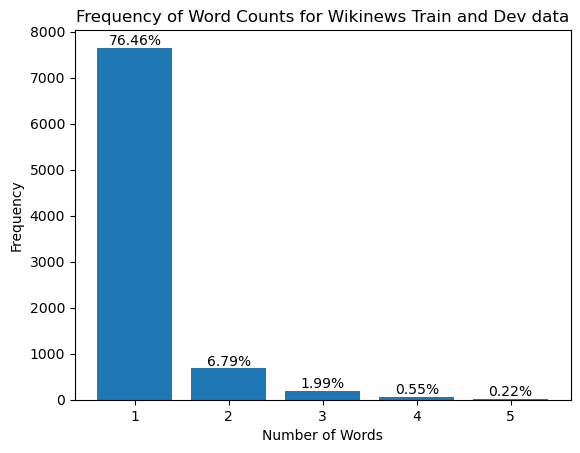

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(train_file_path, dev_file_path):
    # Read the train and dev TSV files into pandas DataFrames
    train_df = pd.read_csv(train_file_path, sep='\t')
    dev_df = pd.read_csv(dev_file_path, sep='\t')

    # Concatenate the train and dev DataFrames
    combined_df = pd.concat([train_df, dev_df], ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Remove bars for 6, 7, and 8 words
    word_count_freq = word_count_freq.drop([6, 7, 8])

    # Calculate the percentage of words in each bar
    total_words = word_counts.sum()
    word_percentage = (word_count_freq / total_words) * 100

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts for Wikinews Train and Dev data')

    # Convert word_percentage Series to a DataFrame
    word_percentage_df = pd.DataFrame({'Percentage': word_percentage})

    # Display the word percentage on each bar
    for i, count in enumerate(word_count_freq.values):
        plt.text(
            word_count_freq.index[i],
            count,
            f'{word_percentage_df["Percentage"].iloc[i]:.2f}%',
            ha='center',
            va='bottom'
        )

    # Display the graph
    plt.show()

# Usage example:
train_file_path = 'cwishareddataset/traindevset/english/Wikinews_Train.tsv'
dev_file_path = 'cwishareddataset/traindevset/english/WikiNews_Dev.tsv'
create_word_count_bar_graph(train_file_path, dev_file_path)


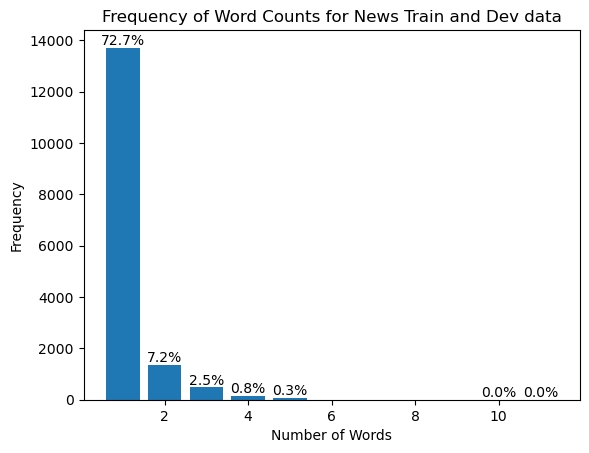

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(train_file_path, dev_file_path):
    # Read the train and dev TSV files into pandas DataFrames
    train_df = pd.read_csv(train_file_path, sep='\t')
    dev_df = pd.read_csv(dev_file_path, sep='\t')

    # Concatenate the train and dev DataFrames
    combined_df = pd.concat([train_df, dev_df], ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Remove bars for 6, 7, and 8 words
    word_count_freq = word_count_freq.drop([6, 7, 8])

    # Calculate the percentage of words in each bar
    total_words = word_counts.sum()
    word_percentage = (word_count_freq / total_words) * 100

    # Round the percentages to one decimal place
    word_percentage = word_percentage.round(1)

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts for News Train and Dev data')

    # Convert word_percentage Series to a DataFrame
    word_percentage_df = pd.DataFrame({'Percentage': word_percentage})

    # Display the word percentage on each bar
    for i, count in enumerate(word_count_freq.values):
        plt.text(
            word_count_freq.index[i],
            count,
            f'{word_percentage_df["Percentage"].iloc[i]:.1f}%',
            ha='center',
            va='bottom'
        )

    # Display the graph
    plt.show()

# Usage example:
train_file_path = 'cwishareddataset/traindevset/english/News_Train.tsv'
dev_file_path = 'cwishareddataset/traindevset/english/News_Dev.tsv'
create_word_count_bar_graph(train_file_path, dev_file_path)


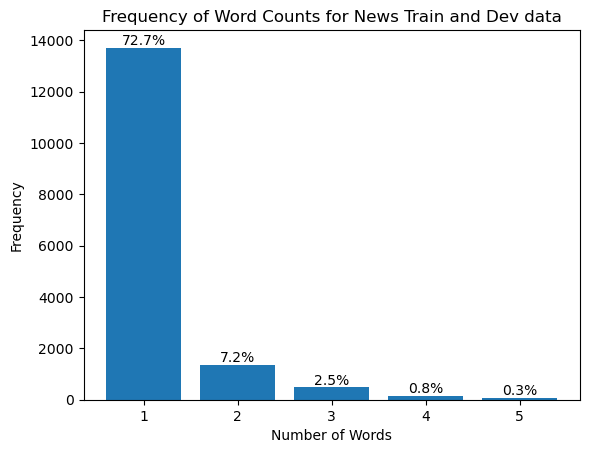

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(train_file_path, dev_file_path):
    # Read the train and dev TSV files into pandas DataFrames
    train_df = pd.read_csv(train_file_path, sep='\t')
    dev_df = pd.read_csv(dev_file_path, sep='\t')

    # Concatenate the train and dev DataFrames
    combined_df = pd.concat([train_df, dev_df], ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Remove bars for 6, 7, and 8 words
    word_count_freq = word_count_freq.drop([6, 7, 8])

    # Calculate the percentage of words in each bar
    total_words = word_counts.sum()
    word_percentage = (word_count_freq / total_words) * 100

    # Round the percentages to one decimal place
    word_percentage = word_percentage.round(1)

    # Filter word counts up to 5 words
    word_count_freq = word_count_freq[word_count_freq.index <= 5]
    word_percentage = word_percentage[word_percentage.index <= 5]

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts for News Train and Dev data')

    # Convert word_percentage Series to a DataFrame
    word_percentage_df = pd.DataFrame({'Percentage': word_percentage})

    # Display the word percentage on each bar
    for i, count in enumerate(word_count_freq.values):
        plt.text(
            word_count_freq.index[i],
            count,
            f'{word_percentage_df["Percentage"].iloc[i]:.1f}%',
            ha='center',
            va='bottom'
        )

    # Display the graph
    plt.show()

# Usage example:
train_file_path = 'cwishareddataset/traindevset/english/News_Train.tsv'
dev_file_path = 'cwishareddataset/traindevset/english/News_Dev.tsv'
create_word_count_bar_graph(train_file_path, dev_file_path)


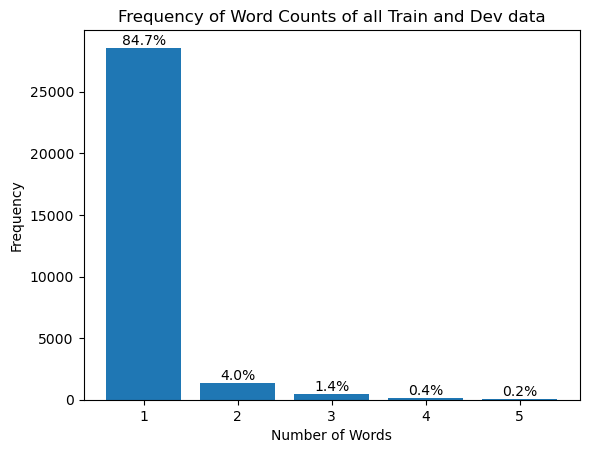

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def create_word_count_bar_graph(file_paths):
    # Read the TSV files into pandas DataFrames
    dfs = []
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep='\t')
        dfs.append(df)

    # Concatenate the DataFrames
    combined_df = pd.concat(dfs, ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Calculate the frequency of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Remove bars for 6, 7, and 8 words
    word_count_freq = word_count_freq.drop([6, 7, 8])

    # Calculate the percentage of words in each bar
    total_words = word_counts.sum()
    word_percentage = (word_count_freq / total_words) * 100

    # Round the percentages to one decimal place
    word_percentage = word_percentage.round(1)

    # Filter word counts up to 5 words
    word_count_freq = word_count_freq[word_count_freq.index <= 5]
    word_percentage = word_percentage[word_percentage.index <= 5]

    # Create a bar graph from the word count frequencies
    plt.bar(word_count_freq.index.astype(int), word_count_freq.values)

    # Add labels and title to the graph
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Word Counts of all Train and Dev data')

    # Convert word_percentage Series to a DataFrame
    word_percentage_df = pd.DataFrame({'Percentage': word_percentage})

    # Display the word percentage on each bar
    for i, count in enumerate(word_count_freq.values):
        plt.text(
            word_count_freq.index[i],
            count,
            f'{word_percentage_df["Percentage"].iloc[i]:.1f}%',
            ha='center',
            va='bottom'
        )

    # Display the graph
    plt.show()

# Usage example:
file_paths = [
    'cwishareddataset/traindevset/english/News_Train.tsv',
    'cwishareddataset/traindevset/english/News_Dev.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Train.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Dev.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Train.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Dev.tsv',
]
create_word_count_bar_graph(file_paths)


Number of rows with 1 word in the fifth column: 28568
Number of rows with 2 words in the fifth column: 1352
Number of rows with 3 words in the fifth column: 479
Number of rows with 4 words in the fifth column: 144
Number of rows with 5 words in the fifth column: 57


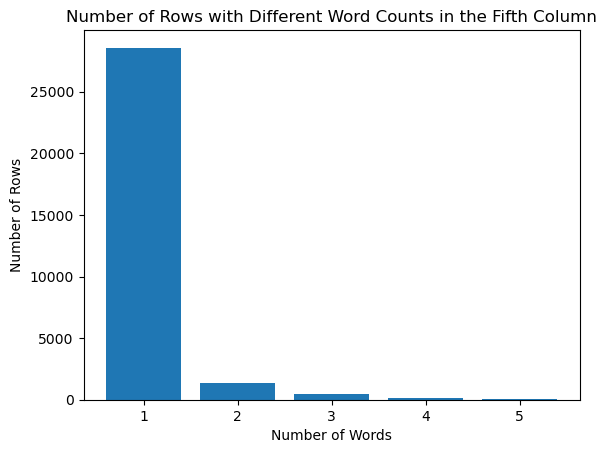

In [8]:
import pandas as pd

def count_n_word_sentences(file_paths, n):
    # Read the TSV files into pandas DataFrames
    dfs = []
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep='\t')
        dfs.append(df)

    # Concatenate the DataFrames
    combined_df = pd.concat(dfs, ignore_index=True)

    # Convert values in the fifth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fifth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Count the number of rows with the specified number of words in the fifth column
    n_word_count = (word_counts == n).sum()

    return n_word_count

# Usage example:
file_paths = [
    'cwishareddataset/traindevset/english/News_Train.tsv',
    'cwishareddataset/traindevset/english/News_Dev.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Train.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Dev.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Train.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Dev.tsv',
]

num_1_word_sentences = count_n_word_sentences(file_paths, 1)
num_2_word_sentences = count_n_word_sentences(file_paths, 2)
num_3_word_sentences = count_n_word_sentences(file_paths, 3)
num_4_word_sentences = count_n_word_sentences(file_paths, 4)
num_5_word_sentences = count_n_word_sentences(file_paths, 5)

print(f"Number of rows with 1 word in the fifth column: {num_1_word_sentences}")
print(f"Number of rows with 2 words in the fifth column: {num_2_word_sentences}")
print(f"Number of rows with 3 words in the fifth column: {num_3_word_sentences}")
print(f"Number of rows with 4 words in the fifth column: {num_4_word_sentences}")
print(f"Number of rows with 5 words in the fifth column: {num_5_word_sentences}")

# Create a list to store the counts for each number of words
counts = []
for n in range(1, 6):
    counts.append(count_n_word_sentences(file_paths, n))

# Plot the bar chart
plt.bar(range(1, 6), counts)

# Add labels and title to the graph
plt.xlabel('Number of Words')
plt.ylabel('Number of Rows')
plt.title('Number of Rows with Different Word Counts in the Fifth Column')

# Display the graph
plt.show()


In [11]:
import pandas as pd

def create_word_count_table(file_paths):
    # Initialize counts for one word and more than one word occurrences
    one_word_counts = 0
    more_than_one_word_counts = 0

    # Initialize a dictionary to store counts for each file
    file_word_counts = {}

    # Process each file
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep='\t')
        df.iloc[:, 4] = df.iloc[:, 4].astype(str)

        # Count the number of words in the fourth column
        word_counts = df.iloc[:, 4].str.split().str.len()

        # Count occurrences of one word and more than one word
        one_word_counts += (word_counts == 1).sum()
        more_than_one_word_counts += (word_counts > 1).sum()

        # Store counts for the current file
        file_name = file_path.split('/')[-1]
        file_word_counts[file_name] = {
            'One Word': (word_counts == 1).sum(),
            'More Than One Word': (word_counts > 1).sum()
        }

    # Calculate totals
    total_files = len(file_paths)
    total_one_word = one_word_counts
    total_more_than_one_word = more_than_one_word_counts

    # Create a LaTeX table
    table_str = "\\begin{tabular}{|l|c|c|}\n"
    table_str += "\\hline\n"
    table_str += "File & One Word & More Than One Word \\\\\n"
    table_str += "\\hline\n"

    # Add rows for each file
    for file_name, counts in file_word_counts.items():
        one_word = counts['One Word']
        more_than_one_word = counts['More Than One Word']
        table_str += f"{file_name} & {one_word} & {more_than_one_word} \\\\\n"
        table_str += "\\hline\n"

    # Add row for totals
    table_str += f"Total & {total_one_word} & {total_more_than_one_word} \\\\\n"
    table_str += "\\hline\n"

    table_str += "\\end{tabular}"

    return table_str

# Usage example:
file_paths = [
    'cwishareddataset/traindevset/english/News_Train.tsv',
    'cwishareddataset/traindevset/english/News_Dev.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Train.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Dev.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Train.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Dev.tsv',
    'cwishareddataset/testset/english/News_Test.tsv',
    'cwishareddataset/testset/english/WikiNews_Test.tsv',
    'cwishareddataset/testset/english/Wikipedia_Test.tsv'
]

# Get the LaTeX table
latex_table = create_word_count_table(file_paths)

# Print or save the LaTeX table as needed
print(latex_table)


\begin{tabular}{|l|c|c|}
\hline
File & One Word & More Than One Word \\
\hline
News_Train.tsv & 11948 & 2053 \\
\hline
News_Dev.tsv & 1501 & 262 \\
\hline
WikiNews_Train.tsv & 6779 & 966 \\
\hline
WikiNews_Dev.tsv & 775 & 94 \\
\hline
Wikipedia_Train.tsv & 4832 & 718 \\
\hline
Wikipedia_Dev.tsv & 605 & 88 \\
\hline
News_Test.tsv & 1812 & 282 \\
\hline
WikiNews_Test.tsv & 1137 & 149 \\
\hline
Wikipedia_Test.tsv & 749 & 120 \\
\hline
Total & 30138 & 4732 \\
\hline
\end{tabular}


In [5]:
import pandas as pd

def create_word_count_table(file_paths):
    # Read the TSV files into pandas DataFrames
    dfs = []
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep='\t')
        dfs.append(df)

    # Concatenate the DataFrames
    combined_df = pd.concat(dfs, ignore_index=True)

    # Convert values in the fourth column to strings
    combined_df.iloc[:, 4] = combined_df.iloc[:, 4].astype(str)

    # Count the number of words in the fourth column
    word_counts = combined_df.iloc[:, 4].str.split().str.len()

    # Count the occurrences of each word count
    word_count_freq = word_counts.value_counts().sort_index()

    # Calculate the total number of words
    total_words = word_counts.sum()

    # Calculate the percentage of words for each count
    word_percentage = (word_count_freq / total_words) * 100

    # Create a LaTeX table
    table_str = "\\begin{tabular}{|c|c|c|}\n"
    table_str += "\\hline\n"
    table_str += "Number of Words & Count & Percentage \\\\\n"
    table_str += "\\hline\n"

    for word_count, count in word_count_freq.items():
        percentage = word_percentage[word_count]
        table_str += f"{word_count} & {count} & {percentage:.1f}\\% \\\\\n"
        table_str += "\\hline\n"

    table_str += "\\end{tabular}"

    return table_str

# Usage example:
file_paths = [
    'cwishareddataset/traindevset/english/News_Train.tsv',
    'cwishareddataset/traindevset/english/News_Dev.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Train.tsv',
    'cwishareddataset/traindevset/english/WikiNews_Dev.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Train.tsv',
    'cwishareddataset/traindevset/english/Wikipedia_Dev.tsv',
]

# Get the LaTeX table
latex_table = create_word_count_table(file_paths)

# Print or save the LaTeX table as needed
print(latex_table)


\begin{tabular}{|c|c|c|}
\hline
Number of Words & Count & Percentage \\
\hline
1 & 28568 & 84.7\% \\
\hline
2 & 1352 & 4.0\% \\
\hline
3 & 479 & 1.4\% \\
\hline
4 & 144 & 0.4\% \\
\hline
5 & 57 & 0.2\% \\
\hline
6 & 11 & 0.0\% \\
\hline
7 & 6 & 0.0\% \\
\hline
8 & 2 & 0.0\% \\
\hline
10 & 1 & 0.0\% \\
\hline
11 & 1 & 0.0\% \\
\hline
\end{tabular}


In [ ]:
from pycorenlp import StanfordCoreNLP
import pandas as pd

def parse_unique_sentences(dataframe, nlp):
    unique_sentences = set(dataframe['sentences_column'])
    parsed_sentences = []
    
    for sentence in unique_sentences:
        result = nlp.annotate(sentence, properties={
            'annotators': 'tokenize,ssplit,pos,lemma,ner,parse',
            'outputFormat': 'json'
        })
        parsed_sentences.append(result)
    
    return parsed_sentences

# Create an instance of StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

# Example usage with a dataframe
df = pd.DataFrame({'sentences_column': ['This is the first sentence.', 'This is the second sentence.']})

parsed_sentences = parse_unique_sentences(df, nlp)

# Print the parsed sentences
for parsed_sentence in parsed_sentences:
    print(parsed_sentence)




In [5]:
import pandas as pd

import pandas as pd

# Read the CSV file
df = pd.read_csv('features_NEW/Wikipedia_Dev_NEW_Feats1.csv')

# Add the new column filled with zeros
df['5_gramfreq'] = 0

# Save the updated DataFrame to a new CSV file
df.to_csv('features_NEW/Wikipedia_Dev_NEW_Feats1_with_5_gramfreq.csv', index=False)


In [6]:
import pandas as pd

# Read the pickle file
df = pd.read_pickle('features_NEW/Wikipedia_Dev_NEW_Feats1.pkl')

# Add the new column filled with zeros
df['5_gramfreq'] = 0

# Save the updated DataFrame to a new pickle file
df.to_pickle('features_NEW/Wikipedia_Dev_NEW_Feats1_with_5_gramfreq.pkl')


In [7]:
import pandas as pd

# Read the .pkl files into DataFrames
df1 = pd.read_pickle("features_NEW/News_Dev_NEW_Feats1.pkl")
df2 = pd.read_pickle("features_NEW/WikiNews_Dev_NEW_Feats1.pkl")
df3 = pd.read_pickle("features_NEW/Wikipedia_Dev_NEW_Feats1.pkl")

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3])

# Write the result back to a .pkl file
combined_df.to_pickle("features_NEW/combined_Dev.pkl")


In [15]:
%pwd

'/Users/adamtucker/Desktop/CWI_masters/baseline_model'

In [46]:
# 1
import pandas as pd
import numpy
import string
import regex as re
import json
import os
from datamuse import datamuse
import pycorenlp
from pycorenlp import StanfordCoreNLP

# Load the data into a DataFrame
data_frame = pd.read_csv('cwishareddataset/traindevset/english/News_Dev.tsv', sep='\t')

# Set the columns for the DataFrame
data_frame.columns = ['ID', 'sentence', 'start_index', 'end_index', 'phrase', 'total_native', 'total_non_native', 'native_complex', 'non_native_complex', 'complex_binary', 'complex_probabilistic']

# Add an 'original_order' column that contains the original index
data_frame['original_order'] = data_frame.index


# Split the phrase into separate words
data_frame['split'] = data_frame['phrase'].apply(lambda x: x.split())
data_frame['count'] = data_frame['split'].apply(lambda x: len(x))

# Separate single words and multi-word expressions (MWEs) preserving the original index
words = data_frame[data_frame['count'] == 1].copy()
MWEs = data_frame[data_frame['count'] >1].copy()



word_set = words.phrase.str.lower().unique()
word_set = pd.DataFrame(word_set, columns=['phrase'])
remove = string.punctuation.replace("-", "").replace("'", "") + '“”'
pattern = r"[{}]".format(remove)
word_set['phrase'] = word_set['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

words = data_frame[data_frame['count'] == 1].copy()
MWEs = data_frame[data_frame['count'] >1].copy()

#function to obtain syablles for words
from datamuse import datamuse
api = datamuse.Datamuse()

def get_syllables(word):
    syllables = 0
    word_results = api.words(sp=word, max=1, md='psf')
    if len(word_results)>0: 
        word = word_results[0]["word"]
        syllables = int(word_results[0]["numSyllables"])
    return syllables

#Apply function to get syllables
word_set['syllables'] = word_set['phrase'].apply(lambda x: get_syllables(x))

#Apply function to get word length 
word_set['length'] = word_set['phrase'].apply(lambda x: len(x))

#take words and merge with values first you will need to clean the phrase column 
words['original phrase'] = words['phrase']
words['phrase'] = words['phrase'].str.lower()
words['phrase'] = words['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

word_features = pd.merge(words, word_set)

#Now parse
import pycorenlp
import pandas as pd
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

sentences = data_frame[['sentence', 'ID']].copy()

sentences = sentences.drop_duplicates()

def removefirsttoken(x):
    x = x.split(' ', 1)[1]
    return x

# if Wikinews:
#     sentences['clean sentence'] = sentences['sentence'].apply(lambda x: removefirsttoken(x))

# else:
sentences['clean sentence'] = sentences['sentence']

#function to parse sentences 
def parse(string):
    output = nlp.annotate(string, properties={
  'annotators': 'pos,depparse',
  'outputFormat': 'json'
  })
    return output

#apply parsing to sentences
sentences['parse'] = sentences['clean sentence'].apply(lambda x: parse(x))

sentences


#Merge 
word_parse_features = pd.merge(sentences, word_features)
word_parse_features


# Sort by the original order
word_parse_features.sort_values('original_order', inplace=True)

# Drop the 'original_order' column
word_parse_features.drop('original_order', axis=1, inplace=True)

# Add missing columns to 'MWEs' with NaN values
for col in word_features.columns.difference(MWEs.columns):
    MWEs[col] = numpy.nan

# Concatenate 'word_features' and 'MWEs'
word_parse_features = pd.concat([word_features, MWEs])

# Sort by index to restore original order
word_parse_features.sort_index(inplace=True)

KeyError: 'original_order'

1763 Rows 

In [ ]:
word_parse_features

In [43]:
word_parse_features
word_parse_features.to_csv('Inspect.csv', index=False)

In [49]:
import pandas as pd
import numpy
import string
import regex as re
import json
import os
from datamuse import datamuse
import pycorenlp
from pycorenlp import StanfordCoreNLP

# Load the data into a DataFrame
data_frame = pd.read_csv('cwishareddataset/traindevset/english/News_Dev.tsv', sep='\t')

# Set the columns for the DataFrame
data_frame.columns = ['ID', 'sentence', 'start_index', 'end_index', 'phrase', 'total_native', 'total_non_native', 'native_complex', 'non_native_complex', 'complex_binary', 'complex_probabilistic']

# Split the phrase into separate words
data_frame['split'] = data_frame['phrase'].apply(lambda x: x.split())
data_frame['count'] = data_frame['split'].apply(lambda x: len(x))

# Separate single words and multi-word expressions (MWEs) preserving the original index
words = data_frame[data_frame['count'] == 1].copy()
MWEs = data_frame[data_frame['count'] > 1].copy()

# Lowercase the unique phrases for word set
word_set = words.phrase.str.lower().unique()
word_set = pd.DataFrame(word_set, columns=['phrase'])

# Create translator for removing punctuation
remove = string.punctuation.replace("-", "").replace("'", "") + '“”'
word_set['phrase'] = word_set['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

# Create datamuse API object
api = datamuse.Datamuse()

def get_syllables(word):
    syllables = 0
    word_results = api.words(sp=word, max=1, md='psf')
    if len(word_results) > 0: 
        word = word_results[0]["word"]
        syllables = int(word_results[0]["numSyllables"])
    return syllables

# Apply function to get syllables
word_set['syllables'] = word_set['phrase'].apply(lambda x: get_syllables(x))

# Apply function to get word length 
word_set['length'] = word_set['phrase'].apply(lambda x: len(x))

# Clean phrases for word features
words['original phrase'] = words['phrase']
words['phrase'] = words['phrase'].str.lower()
words['phrase'] = words['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

# Merge word features with word set
word_features = pd.merge(words, word_set)

# Create Stanford NLP object
nlp = StanfordCoreNLP('http://localhost:9000')

# Load sentences
sentences = data_frame[['sentence', 'ID']].copy()
sentences = sentences.drop_duplicates()

# Clean up the sentences
sentences['clean sentence'] = sentences['sentence']

# Define a function to parse sentences 
def parse(string):
    output = nlp.annotate(string, properties={
  'annotators': 'pos,depparse',
  'outputFormat': 'json'
  })
    return output

# Apply parsing to sentences
sentences['parse'] = sentences['clean sentence'].apply(lambda x: parse(x))

# Merge word features with sentences
word_parse_features = pd.merge(sentences, word_features)

# Add missing columns to 'MWEs' with NaN values
for col in word_features.columns.difference(MWEs.columns):
    MWEs[col] = numpy.nan

# Concatenate 'word_features' and 'MWEs'
word_parse_features = pd.concat


# Concatenate 'word_features' and 'MWEs'
word_parse_features = pd.concat([word_features, MWEs])

# Sort by 'original_order' to restore original order
word_parse_features.sort_values('original_order', inplace=True)

# Drop the 'original_order' column
word_parse_features.drop('original_order', axis=1, inplace=True)


KeyError: 'original_order'

In [28]:
import os
import pandas as pd
import string
from datamuse import datamuse
from pycorenlp import StanfordCoreNLP

file_path = ('cwishareddataset/traindevset/english/pickled-dataframes/News_Dev.pkl')


# Initialize Datamuse API and StanfordCoreNLP
api = datamuse.Datamuse()
nlp = StanfordCoreNLP('http://localhost:9000')






# Read the .pkl file into a DataFrame
data_frame = pd.read_pickle(file_path)

data_frame.columns = ['ID', 'sentence', 'start_index', 'end_index', 'phrase', 'total_native',
                      'total_non_native', 'native_complex', 'non_native_complex', 'complex_binary',
                      'complex_probabilistic']

# Perform data processing
data_frame['split'] = data_frame['phrase'].apply(lambda x: x.split())
data_frame['count'] = data_frame['split'].apply(lambda x: len(x))
words = data_frame[data_frame['count'] == 1]
MWEs = data_frame[data_frame['count'] > 1]
word_set = words.phrase.str.lower().unique()
word_set = pd.DataFrame(word_set, columns=['phrase'])
remove = string.punctuation.replace("-", "").replace("'", "") + '“”'
pattern = r"[{}]".format(remove)
word_set['phrase'] = word_set['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

# Function to obtain syllables for words
def get_syllables(word):
    syllables = 0
    word_results = api.words(sp=word, max=1, md='psf')
    if len(word_results) > 0:
        word = word_results[0]["word"]
        syllables = int(word_results[0]["numSyllables"])
    return syllables

# Apply function to get syllables
word_set['syllables'] = word_set['phrase'].apply(lambda x: get_syllables(x))

# Apply function to get word length
word_set['length'] = word_set['phrase'].apply(lambda x: len(x))

# Take words and merge with values first you will need to clean the phrase column
words['original phrase'] = words['phrase']
words['phrase'] = words['phrase'].str.lower()
words['phrase'] = words['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

word_features = pd.merge(words, word_set)

sentences = data_frame[['sentence', 'ID']].copy()
sentences = sentences.drop_duplicates()

def removefirsttoken(x):
    x = x.split(' ', 1)[1]
    return x

sentences['clean sentence'] = sentences['sentence']

# Function to parse sentences

def parse(string):
            output = nlp.annotate(string, properties={
          'annotators': 'pos,depparse',
          'outputFormat': 'json'
          })
            return output

# Apply parsing to sentences
sentences['parse'] = sentences['clean sentence'].apply(lambda x: parse(x))

# Merge word features with parsed sentences, leaving extra columns with empty values
word_parse_features = pd.merge(sentences, word_features, how='left')
word_parse_features = pd.concat([word_parse_features, MWEs])




/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/2911596648.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words['original phrase'] = words['phrase']
/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/2911596648.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words['phrase'] = words['phrase'].str.lower()
/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/2911596648.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [24]:
word_parse_features.to_csv('Inspection.csv', index=False)

In [29]:
import os
import pandas as pd
import string
from datamuse import datamuse
from pycorenlp import StanfordCoreNLP



# Initialize Datamuse API and StanfordCoreNLP
api = datamuse.Datamuse()
nlp = StanfordCoreNLP('http://localhost:9000')




file_path = ('cwishareddataset/traindevset/english/pickled-dataframes/News_Dev.pkl')

# Read the .pkl file into a DataFrame
data_frame = pd.read_pickle(file_path)

data_frame.columns = ['ID', 'sentence', 'start_index', 'end_index', 'phrase', 'total_native',
                      'total_non_native', 'native_complex', 'non_native_complex', 'complex_binary',
                      'complex_probabilistic']

# Perform data processing
data_frame['split'] = data_frame['phrase'].apply(lambda x: x.split())
data_frame['count'] = data_frame['split'].apply(lambda x: len(x))
words = data_frame[data_frame['count'] == 1]
MWEs = data_frame[data_frame['count'] > 1]
word_set = words.phrase.str.lower().unique()
word_set = pd.DataFrame(word_set, columns=['phrase'])
remove = string.punctuation.replace("-", "").replace("'", "") + '“”'
pattern = r"[{}]".format(remove)
word_set['phrase'] = word_set['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

# Function to obtain syllables for words
def get_syllables(word):
    syllables = 0
    word_results = api.words(sp=word, max=1, md='psf')
    if len(word_results) > 0:
        word = word_results[0]["word"]
        syllables = int(word_results[0]["numSyllables"])
    return syllables

# Apply function to get syllables
word_set['syllables'] = word_set['phrase'].apply(lambda x: get_syllables(x))

# Apply function to get word length
word_set['length'] = word_set['phrase'].apply(lambda x: len(x))

# Take words and merge with values first you will need to clean the phrase column
words['original phrase'] = words['phrase']
words['phrase'] = words['phrase'].str.lower()
words['phrase'] = words['phrase'].apply(lambda x: x.translate({ord(char): None for char in remove}))

word_features = pd.merge(words, word_set)

sentences = data_frame[['sentence', 'ID']].copy()
sentences = sentences.drop_duplicates()


sentences['clean sentence'] = sentences['sentence']

def parse(string):
            output = nlp.annotate(string, properties={
          'annotators': 'pos,depparse',
          'outputFormat': 'json'
          })
            return output

# Apply parsing to sentences
sentences['parse'] = sentences['clean sentence'].apply(lambda x: parse(x))

# Merge word features with parsed sentences
word_parse_features = pd.merge(sentences, word_features, how='left')

# Add back rows with multiple words in the "phrase" column in the original order
word_parse_features = pd.concat([word_parse_features, MWEs]).sort_values(by='ID')

# # Output the final DataFrame
# output_file_path = os.path.join(output_folder, filename)
# word_parse_features.to_pickle(output_file_path)


/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/838191623.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words['original phrase'] = words['phrase']
/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/838191623.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words['phrase'] = words['phrase'].str.lower()
/var/folders/qm/g52sxk4d4qsg16xphqz6vvtc0000gn/T/ipykernel_45511/838191623.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [32]:
word_parse_features

,sentence,ID,clean sentence,parse,start_index,end_index,phrase,total_native,total_non_native,native_complex,non_native_complex,complex_binary,complex_probabilistic,split,count,original phrase,syllables,length
380,"Created from a merger of seven savings banks, ...",32XN26MTXZKFQA5UOBZS7M7QMD2L0O,"Created from a merger of seven savings banks, ...","{\n ""sentences"": [\n {\n ""index"": 0,\...",31,38,savings,10,10,0,0,0,0.00,[savings],1,savings,2.0,7.0
400,Bank of Spain figures show commercial banks he...,32XN26MTXZKFQA5UOBZS7M7QMD2L0O,Bank of Spain figures show commercial banks he...,"{\n ""sentences"": [\n {\n ""index"": 0,\...",184,187,end,10,10,0,0,0,0.00,[end],1,end,1.0,3.0
399,Bank of Spain figures show commercial banks he...,32XN26MTXZKFQA5UOBZS7M7QMD2L0O,Bank of Spain figures show commercial banks he...,"{\n ""sentences"": [\n {\n ""index"": 0,\...",158,166,property,10,10,0,0,0,0.00,[property],1,property,3.0,8.0
398,Bank of Spain figures show commercial banks he...,32XN26MTXZKFQA5UOBZS7M7QMD2L0O,Bank of Spain figures show commercial banks he...,"{\n ""sentences"": [\n {\n ""index"": 0,\...",107,115,property,10,10,0,0,0,0.00,[property],1,property,3.0,8.0
397,Bank of Spain figures show commercial banks he...,32XN26MTXZKFQA5UOBZS7M7QMD2L0O,Bank of Spain figures show commercial banks he...,"{\n ""sentences"": [\n {\n ""index"": 0,\...",90,95,loans,10,10,0,0,0,0.00,[loans],1,loans,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,But Crocker said there would be no repeat of t...,3ZXNP4Z39RMT8L5E9AK1M1HDU3N7LD,NaN,NaN,92,106,in the wake of,10,10,1,0,1,0.05,"[in, the, wake, of]",4,NaN,NaN,NaN
1482,But Crocker said there would be no repeat of t...,3ZXNP4Z39RMT8L5E9AK1M1HDU3N7LD,NaN,NaN,76,91,Western backers,10,10,1,0,1,0.05,"[Western, backers]",2,NaN,NaN,NaN
1477,"That has to be left to Afghans.""",3ZXNP4Z39RMT8L5E9AK1M1HDU3N7LD,NaN,NaN,15,30,left to Afghans,10,10,0,0,0,0.00,"[left, to, Afghans]",3,NaN,NaN,NaN
1470,We cannot be in a position of taking on oursel...,3ZXNP4Z39RMT8L5E9AK1M1HDU3N7LD,NaN,NaN,30,72,taking on ourselves bringing perfection to,10,10,0,0,0,0.00,"[taking, on, ourselves, bringing, perfection, to]",6,NaN,NaN,NaN


In [48]:
# Specify the path of the .pkl file
pkl_file_path = "../Camb_A/All_features/WikiNews_Train_pp.pkl"

# Read the .pkl file into a DataFrame
data_frame = pd.read_pickle(pkl_file_path)

# Specify the path for the output CSV file
csv_file_path = "../Camb_A/All_Features/WikiNews_Train_pp.csv"

# Save the DataFrame as a CSV file
data_frame.to_csv(csv_file_path, index=False)

'/Users/adamtucker/Desktop/CWI_masters/baseline_model'

In [40]:
import pandas as pd
import numpy as np
import pickle

# Load data from pickle file
with open('../camb_model/cwi_2018-master/final_camb_feats_all/News_Dev_actual_all_NEW', 'rb') as f:
    df = pickle.load(f)

# Replace "pos" with the name of your column if it is different
df['pos'] = df['pos'].fillna('')

# Select remaining columns except 'pos'
remaining_columns = df.columns[df.columns != 'pos']

# Fill remaining columns with 0.0
df[remaining_columns] = df[remaining_columns].fillna(0.0)

# Save the cleaned DataFrame back to pickle file
with open('../camb_model/cwi_2018-master/final_camb_feats_all/News_Dev_.pkl', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
# Divide data into non-native and native

import os
import pandas as pd
import numpy as np
import pickle

def split_pkl_files(directory_path):
    # Get all .pkl files in the directory
    files = [f for f in os.listdir(directory_path) if f.endswith('_pp.pkl')]

    for file in files:
        # Create full file path
        file_path = os.path.join(directory_path, file)
        with open(file_path, 'rb') as f:
            df = pickle.load(f)
        
        # Split DataFrame into 'Native' and 'Non-Native' parts
        df_native = df.dropna(subset=['native_compex'])
        df_non_native = df.dropna(subset=['non_native_complex'])

        # Create new file names
        native_file_name = 'Native_' + file.rsplit('.', 1)[0] + '.pkl'
        non_native_file_name = 'Non_Native_' + file.rsplit('.', 1)[0] + '.pkl'
        
        native_file_path = os.path.join(directory_path, native_file_name)
        non_native_file_path = os.path.join(directory_path, non_native_file_name)

        # Save the split DataFrames back to new pickle files
        with open(native_file_path, 'wb') as f:
            pickle.dump(df_native, f)
            
        with open(non_native_file_path, 'wb') as f:
            pickle.dump(df_non_native, f)

# Call the function with the directory containing your .pkl files
split_pkl_files('final_camb_feats_all/')


In [ ]:
# Combine data in one file

import os
import pickle

def combine_files(file_list, output_file):
    combined_data = []
    for file_name in file_list:
        with open(file_name, 'rb') as file:
            data = pickle.load(file)
            combined_data.extend(data)

    with open(output_file, 'wb') as combined_file:
        pickle.dump(combined_data, combined_file)

if __name__ == "__main__":
    folder_path = "CWI_Data/cwishareddataset/traindevset/english/pickled-dataframes"  # Update this to the path where the files are located
    output_file = "CWI_Data/cwishareddataset/traindevset/english/pickled-dataframes/combined_Dev.pkl"
    
    dev_files = [file for file in os.listdir(folder_path) if file.endswith("_Dev.pkl")]

    if not dev_files:
        print("No files with '_Dev.pkl' suffix found.")
    else:
        print("Combining files...")
        combine_files([os.path.join(folder_path, file) for file in dev_files], os.path.join(folder_path, output_file))
        print("Files combined successfully.")
